In [14]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_sample_image
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
# Load sample images
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china,flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

/home/chris/Documents/projects_scikit_tensorflow/env/local/lib/python3.5/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/chris/Documents/projects_scikit_tensorflow/env/local/lib/python3.5/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/chris/Documents/projects_scikit_tensorflow/env/local/lib/python3.5/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/chris/Documents/projects_scikit_tensorfl

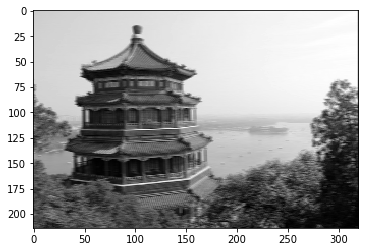

In [17]:


# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

# Create a graph with input X plus a convolutional layer applying the 2 filters
x = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(x, filters, strides=[1,2,2,1], padding='SAME')

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={x: dataset})
    


plt.imshow(output[0, :, :, 1], cmap='gray')  # plot 1st image's second feature map
plt.show()